<a href="https://colab.research.google.com/github/SawairaK/Gender_detection/blob/main/Gender_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Install the Kaggle API.
Set up Kaggle API credentials.
Download the utkface-new dataset from Kaggle.
Unzip the downloaded dataset and remove the .zip file afterward.

In [1]:
!pip install -q kaggle

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 99% 329M/331M [00:04<00:00, 104MB/s] 
100% 331M/331M [00:04<00:00, 70.2MB/s]


In [4]:
!unzip *.zip && rm -rf *.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [10]:
import os
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Change the import statement to the correct location
import cv2
import imageio

In [11]:
# Append images and images labels
images = []
labels = []

In [12]:
DIRECTORY = "/content/UTKFace/"
for image in os.listdir(DIRECTORY):
  path = DIRECTORY+image            # Adding images to path
  gender = path.split('/')[-1].split('_')[1]  # Extracting gender labels from datafile
  face = imageio.imread(path)  # Read image
  face = cv2.resize(face, (85, 85))     # resize the images to uniform
  images.append(face)
  labels.append(int(gender))

<ipython-input-12-8fbba3cc7bca>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imageio.imread(path)


In [13]:
print("X : ", len(images))
print("Y : ", len(labels))

X :  23708
Y :  23708


In [14]:
# Convert images into arrays
X = np.array(images)
Y = np.array(labels)

X = X.astype('float32')

In [15]:
X[0].shape

(85, 85, 3)

In [16]:
X_data = np.squeeze(X)
X_data.shape

(23708, 85, 85, 3)

In [17]:
# Normalize the data
X_data /= 255

In [18]:
Y_data = to_categorical(Y, num_classes=2)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)

In [21]:
print(X_train.shape)

(18966, 85, 85, 3)


In [22]:
print(y_train.shape)

(18966, 2)


In [23]:
print(X_test.shape)

(4742, 85, 85, 3)


In [24]:
print(y_test.shape)

(4742, 2)


In [25]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [26]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(85, 85, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 85, 85, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 42, 42, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 42, 42, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       3,201,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           2,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,300,442 (12.59 MB)

 Trainable params: 3,300,442 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=15,
         validation_data=(X_test, y_test),)

Epoch 1/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.6792 - loss: 0.5749 - val_accuracy: 0.8693 - val_loss: 0.3087
Epoch 2/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8646 - loss: 0.3116 - val_accuracy: 0.8800 - val_loss: 0.2718
Epoch 3/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8844 - loss: 0.2717 - val_accuracy: 0.8840 - val_loss: 0.2654
Epoch 4/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8921 - loss: 0.2485 - val_accuracy: 0.8943 - val_loss: 0.2422
Epoch 5/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9102 - loss: 0.2189 - val_accuracy: 0.9013 - val_loss: 0.2350
Epoch 6/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9143 - loss: 0.2103 - val_accuracy: 0.8990 - val_loss: 0.2418
Epoch 7/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9182 - loss: 0.1972 - val_accuracy: 0.9059 - val_loss: 0.2252
Epoch 8/15
297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9260 - loss: 0.1788 - val_acc

In [32]:
# Saving the Model
model.save('gender_classification_model.h5')

In [33]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9053142070770264


In [34]:
labels =["Male",  # index 0
        "Female",      # index 1
        ]
print('Male ->', '0', '\nFemale ->', '1')

Male -> 0 
Female -> 1


In [35]:
import matplotlib.pyplot as plt

149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


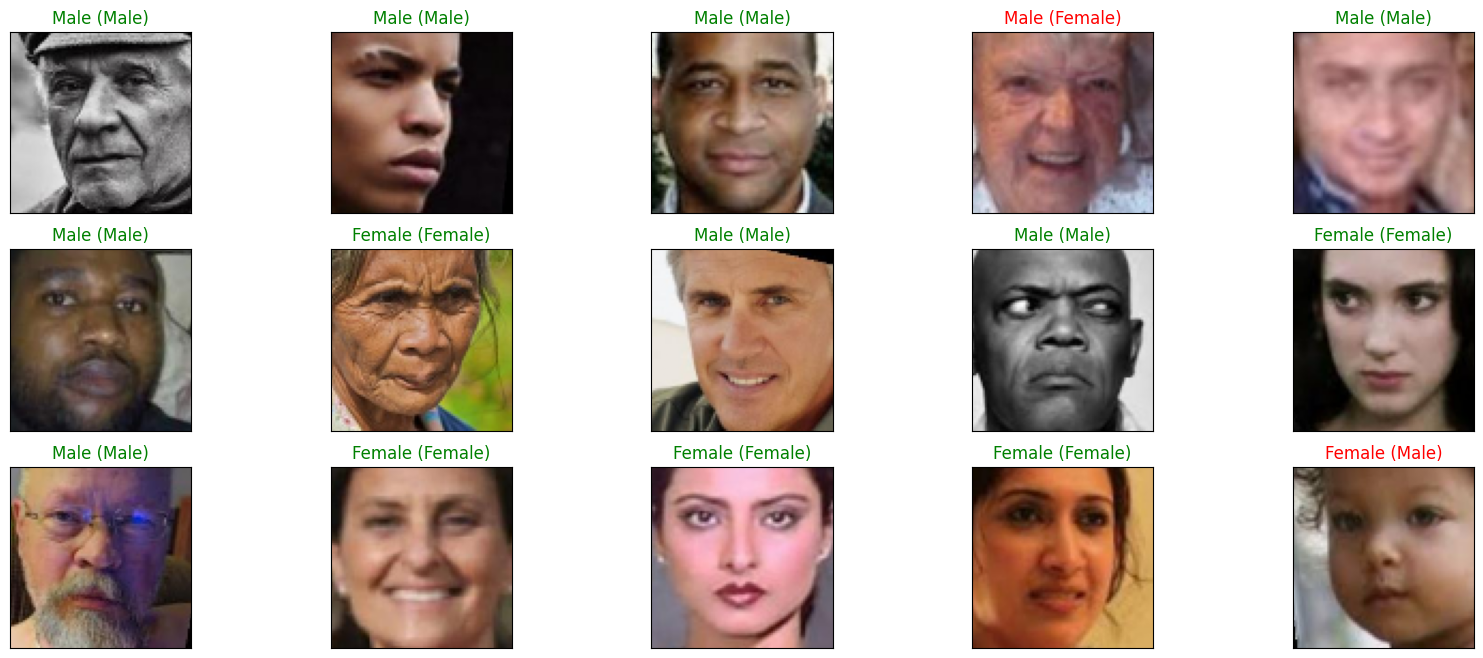

In [36]:
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()